In [19]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [20]:
import os
import re
import matplotlib
import matplotlib.pyplot as plt
import glob
import math
import numpy as np
#import pandas as pd
from bisect import *
from decimal import Decimal
#from scipy.optimize import curve_fit
#import scipy.special as sps

In [21]:
def poi(lm, n) :
 a = np.empty([n])
 a[0] = math.exp(-lm)
 for j in range(1,n):
   a[j]=a[j-1]*lm/j
 return a

poi(1.,20)

array([3.67879441e-01, 3.67879441e-01, 1.83939721e-01, 6.13132402e-02,
       1.53283100e-02, 3.06566201e-03, 5.10943668e-04, 7.29919526e-05,
       9.12399408e-06, 1.01377712e-06, 1.01377712e-07, 9.21615563e-09,
       7.68012969e-10, 5.90779207e-11, 4.21985148e-12, 2.81323432e-13,
       1.75827145e-14, 1.03427732e-15, 5.74598513e-17, 3.02420270e-18])

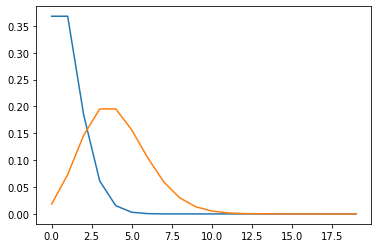

In [22]:
plt.plot(poi(1.,20))
plt.plot(poi(4.,20))
plt.show()

In [23]:
#https://gitlab.cern.ch/CLHEP/CLHEP/-/blob/develop/Random/src/RandPoissonQ.cc#L221
def poiGaus(lm,n) :
  
  sig2 = lm * (0.9998654 - 0.08346/lm);
  sigma = math.sqrt(sig2);
  t = 1./(sig2);

  a2 = t/6. + t*t/324.;
  a1 = math.sqrt (1.-2.*a2*a2*sig2);
  a0 = lm + 0.5 - sig2 * a2;
 
  # x = a0 + x*(a1*x +a2)
  
  A = 1./(sigma*math.sqrt(2.*3.14157))
  a = np.empty([n])
  for j in range(0,n):
    a[j] = 0
    for k in range(0,20) : 
      x = j +0.05*k + 0.5
      y = (math.sqrt(a1*a1-4*a2*(a0-x))-a1)/(2*a2)
      y = -0.5*y*y*t
      a[j] += A*math.exp(y)
    a[j] /= 20.
  return a
         
         
poiGaus(4.,20)

array([2.49847393e-02, 8.10673798e-02, 1.52335554e-01, 1.95934121e-01,
       1.90071251e-01, 1.47959185e-01, 9.64214833e-02, 5.42261966e-02,
       2.69208822e-02, 1.20054842e-02, 4.87575406e-03, 1.82335197e-03,
       6.33562741e-04, 2.06090422e-04, 6.31562049e-05, 1.83313974e-05,
       5.06289336e-06, 1.33585831e-06, 3.37905320e-07, 8.21928989e-08])

In [24]:
#https://www.johndcook.com/blog/wilson_hilferty/
def poiGausWH(lm,n) :
  A =0.0
  a = np.empty([n])
  for j in range(0,n):
    a[j] = 0
    for k in range(0,20) : 
      x = j +0.05*k - 0.5
      c = math.pow(lm/(1.+x),1./3.)
      mu = 1. - 1./(9*x+9)
      s = 1/(3*math.sqrt(1+x))
      y = (c-mu)/s
      a[j] += math.exp(-0.5*y*y)
    A+=a[j]
  a = a/A
  return a

In [25]:
#https://www.astesj.com/publications/ASTESJ_050249.pdf
def poiGausWH2(lm,n) :
  A =0.0
  a = np.empty([n])
  for j in range(0,n):
    a[j] = 0
    for k in range(0,20) : 
      x = j +0.05*k + 0.5
      x -= 1./3.
      x = math.pow(x,2./3.) - math.pow(lm,2./3.)
      x *= 3./(2.*math.pow(lm,1./6.))
      a[j] += math.exp(-0.5*x*x)
    A+=a[j]
  a = a/A
  return a    

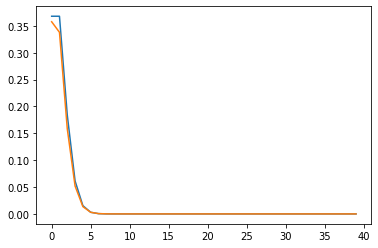

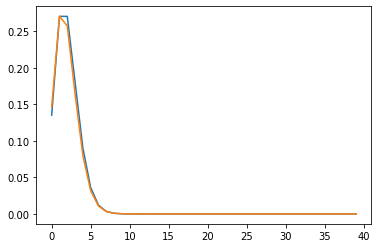

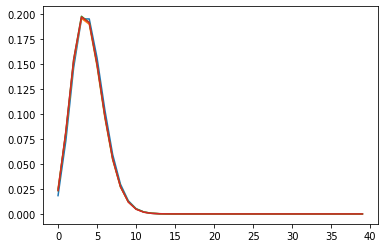

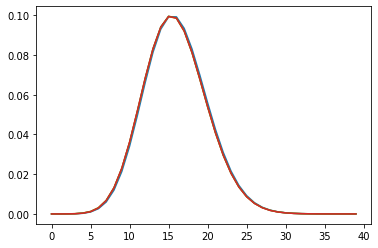

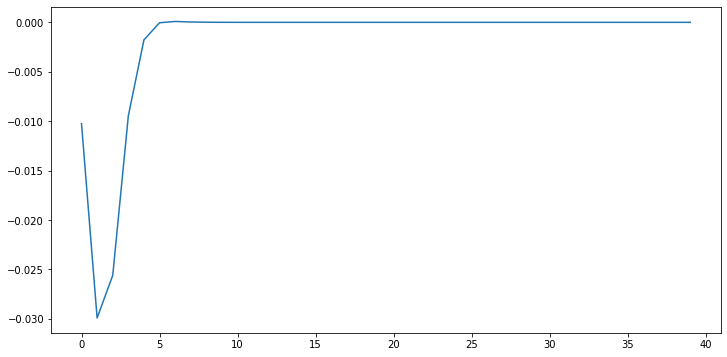

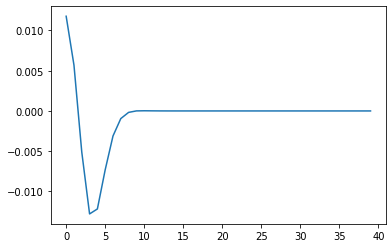

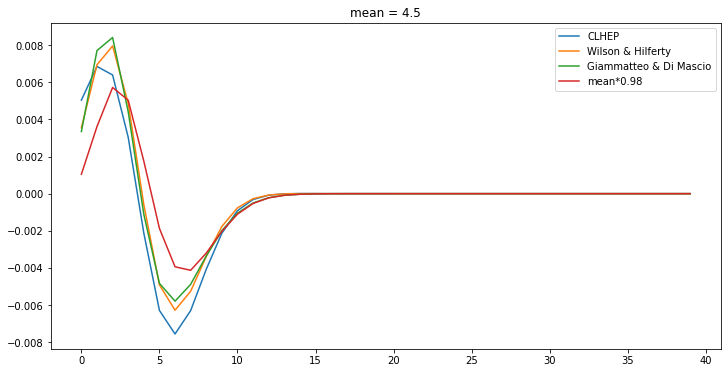

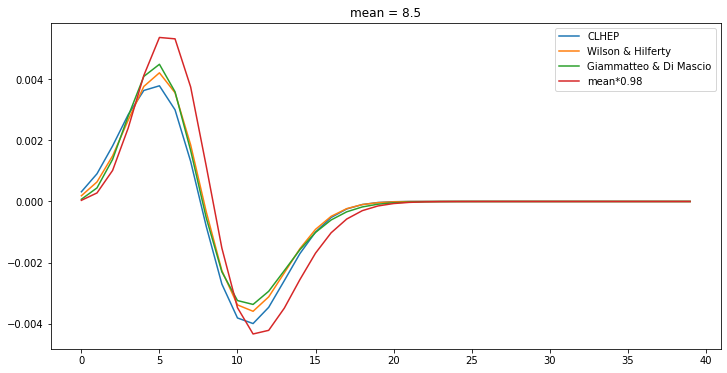

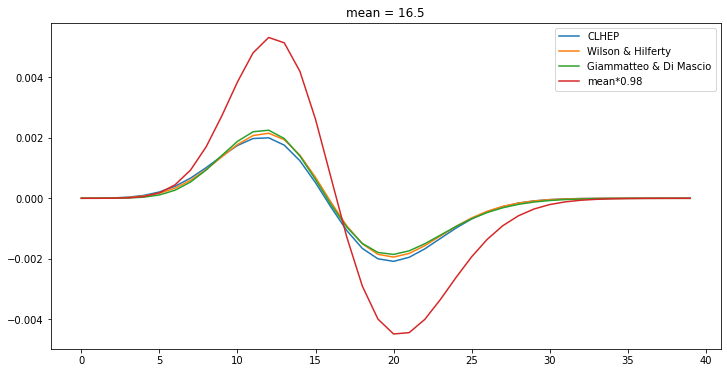

In [28]:
plt.plot(poi(1.,40))
plt.plot(poiGaus(1.,40))
plt.show()

plt.plot(poi(2.,40))
plt.plot(poiGaus(2.,40))
plt.show()

plt.plot(poi(4.,40))
plt.plot(poiGaus(4.,40))
plt.plot(poiGausWH(4.,40))
plt.plot(poiGausWH2(4.,40))
plt.show()


plt.plot(poi(16.,40))
plt.plot(poiGaus(16.,40))
plt.plot(poiGausWH(16.,40))
plt.plot(poiGausWH2(16.,40))
plt.show()

fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(poiGaus(1.,40)-poi(1.,40))
plt.show()
plt.plot(poiGaus(2.5,40)-poi(2.5,40))
plt.show()

fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(poiGaus(4.5,40)-poi(4.5,40), label="CLHEP")
plt.plot(poiGausWH(4.5,40)-poi(4.5,40), label="Wilson & Hilferty")
plt.plot(poiGausWH2(4.5,40)-poi(4.5,40),label="Giammatteo & Di Mascio")
plt.plot(poi(4.5*0.98,40)-poi(4.5,40), label="mean*0.98")
plt.title("mean = 4.5")
plt.legend(loc='upper right')
plt.show()
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(poiGaus(8.5,40)-poi(8.5,40), label="CLHEP")
plt.plot(poiGausWH(8.5,40)-poi(8.5,40), label="Wilson & Hilferty")
plt.plot(poiGausWH2(8.5,40)-poi(8.5,40),label="Giammatteo & Di Mascio")
plt.plot(poi(8.5*0.98,40)-poi(8.5,40), label="mean*0.98")
plt.title("mean = 8.5")
plt.legend(loc='upper right')
plt.show()
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(poiGaus(16.5,40)-poi(16.5,40), label="CLHEP")
plt.plot(poiGausWH(16.5,40)-poi(16.5,40), label="Wilson & Hilferty")
plt.plot(poiGausWH2(16.5,40)-poi(16.5,40),label="Giammatteo & Di Mascio")
plt.plot(poi(16.5*0.98,40)-poi(16.5,40), label="mean*0.98")
plt.title("mean = 16.5")
plt.legend(loc='upper right')
plt.show()